# Code boxes Chapter 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pymc3 as pm

## Py code 3.1

In [2]:
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
Pr_Positive = Pr_Positive_Vampire * Pr_Vampire + Pr_Positive_Mortal * (1 - Pr_Vampire)

Pr_Vampire_Positive = Pr_Positive_Vampire * Pr_Vampire / Pr_Positive
print(Pr_Vampire_Positive)

0.08683729433272395


## Py code 3.2

In [3]:
p_grid = np.linspace(0, 1, num=1000)
prob_p = np.ones(1000)
prob_data = stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = prob_data * prob_p
posterior /= np.sum(posterior)

## Py code 3.3

In [4]:
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

## Py code 3.4

The python code below actually reproduces a figure similar to the one shown in the book, Fig 3.1. The code however would make a more simple figure.

(0, 1)

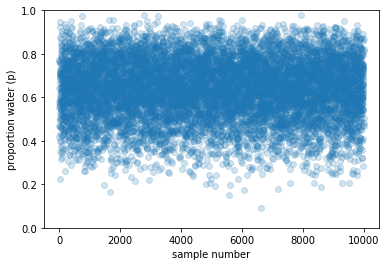

In [5]:
plt.plot(samples, 'o', alpha=0.2)
plt.xlabel('sample number')
plt.ylabel('proportion water (p)')
plt.ylim([0, 1])

## Py code 3.5

Instead of the `rethinking` package we are again using the kernel density plot from `seaborn`.

Text(0, 0.5, 'Density')

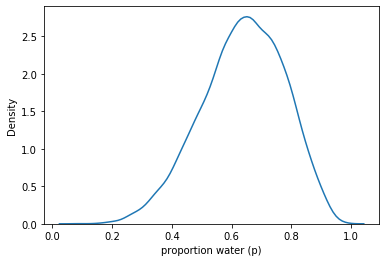

In [6]:
sns.kdeplot(samples)
plt.xlabel('proportion water (p)')
plt.ylabel('Density')

## Py code 3.6

In [7]:
np.sum(posterior[np.where(p_grid < 0.5)])

0.17187458902022873

## Py code 3.7

In [8]:
np.sum(samples<0.5) / 1e4

0.1679

*Note*: In Py code 3.6 we summed up the values of posterior at the indices where p_grid has values < 0.5. Here we count the number of samples that are < 0.5. `samples<0.5` on the numpy array `samples` simply creates a boolean mask, building the sum over it gives us the number of samples because `True` is interpreted as 1 and `False` is interpreted as `0`. This is the same as in `R`, see the "overthinking" paragraph below these examples in the book.

## Py code 3.8

In [9]:
np.sum(np.logical_and(samples > 0.5, samples < 0.75)) / 1e4

0.6071

## Py code 3.9

In [10]:
np.quantile(samples, 0.8)

0.7617617617617618

## Py code 3.10

In [11]:
np.quantile(samples, [0.1, 0.9])

array([0.45045045, 0.81281281])

## Py code 3.11

In [12]:
p_grid = np.linspace(0, 1, num=1000)
prior = np.ones(1000)
likelihood = stats.binom.pmf(k=3, n=3, p=p_grid)
posterior = likelihood * prior
posterior /= np.sum(posterior)

samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

## Py code 3.12

In [13]:
np.quantile(samples, [0.25, 0.75])

array([0.70770771, 0.93193193])

*Note*: Using the quantile function is identical to using the percentile function as following:

In [14]:
np.percentile(samples, [25, 75])

array([0.70770771, 0.93193193])

## Py code 3.13

In [15]:
pm.stats.hpd(samples, credible_interval=0.5)

array([0.84184184, 1.        ])

## Py code 3.14

In [16]:
p_grid[np.argmax(posterior)]

1.0

## Py code 3.15

In [17]:
stats.mode(samples)[0]

array([0.97497497])

## Py code 3.16

In [18]:
np.mean(samples)

0.7993624624624625

In [19]:
np.median(samples)

0.8418418418418419

## Py code 3.17

In [20]:
np.sum(posterior * np.abs(0.5 - p_grid))

0.31287518749981214

## Py code 3.18

In [21]:
loss = [np.sum(posterior * np.abs(x - p_grid)) for x in p_grid]

## Py code 3.19

In [22]:
p_grid[np.argmin(loss)]

0.8408408408408409

## Py code 3.20

In [23]:
stats.binom.pmf(k=range(3), n=2, p=0.7)

array([0.09, 0.42, 0.49])

## Py code 3.21

In [24]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([2])

## Py code 3.22

In [25]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([2, 2, 1, 0, 1, 2, 2, 1, 1, 2])

## Py code 3.23

In [26]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(dummy_w == i).mean() for i in range(3)]

[0.08915, 0.42112, 0.48973]

*Note*: `dummy_w == i` makes a mask on the numpy array. as before, all `True` values are interpreted as ones, all `False` as zeros when calculating the mean.

## Py code 3.24

Text(0, 0.5, 'Frequency')

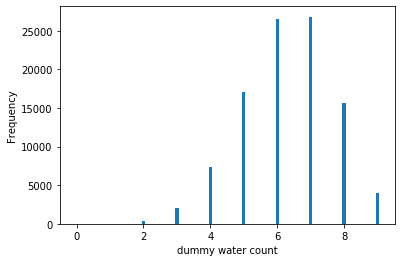

In [27]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
plt.hist(dummy_w, bins=np.arange(-0.5, 10, 1), rwidth=0.1)
plt.xlabel('dummy water count')
plt.ylabel('Frequency')

*Note*: Here we are forcing 10 bins from 0 to 9 that are right on the integer by giving a 11 bin ranges. See `plt.hist?` for help. Alternatively we could also specify 50 - 100 bins, that way we would likely have a bin that is very close to an integer value.

## Py code 3.25

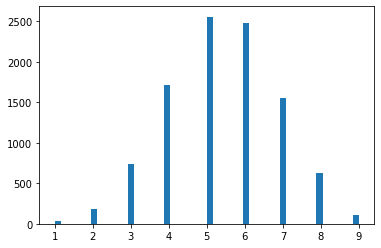

In [28]:
w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))

# Also plot the distribution, as above:
plt.hist(w, bins=50)
plt.show()

## Py code 3.26

### Preparation
The first cell below reruns the samples from before. The current `samples` are the ones from Figure 3.3 and are not the ones with `n=9`, `k=6`.

In [29]:
p_grid = np.linspace(0, 1, num=1000)
prob_p = np.ones(1000)
prob_data = stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = prob_data * prob_p
posterior /= np.sum(posterior)
samples = np.random.choice(p_grid, p=posterior, size=10000, replace=True)

### Code

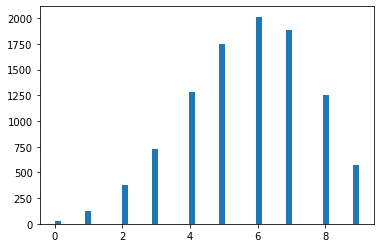

In [30]:
w = stats.binom.rvs(n=9, p=samples, size=int(1e4))

# also plot
plt.hist(w, bins=50)
plt.show()

## Py code 3.27

In [31]:
p_grid = np.linspace(0, 1, num=1000)
prior = np.ones(1000)
likelihood = stats.binom.pmf(k=6, n=9, p=p_grid)
posterior = likelihood * prior
posterior /= np.sum(posterior)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

## Py code 3.28

In [32]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,
                   0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,
                   0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,
                   1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
                   1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,
                   1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,
                   0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])

## Py code 3.29

Not applicable, the two numpy arrays can be copied from above.

## Py code 3.30

In [33]:
np.sum(birth1) + np.sum(birth2)

111